<a href="https://colab.research.google.com/github/adewale-codes/computer_vision_practice/blob/main/fourier_transform_colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📷 Image Processing with Python — Fourier Transformation
How to use Fourier Transform to detect and remove noise or patterns from images.


In [20]:
# Upload the image file first (e.g., against_the_light.jpg)
from google.colab import files
uploaded = files.upload()


Saving istockphoto-814423752-612x612.jpg to istockphoto-814423752-612x612 (1).jpg


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray


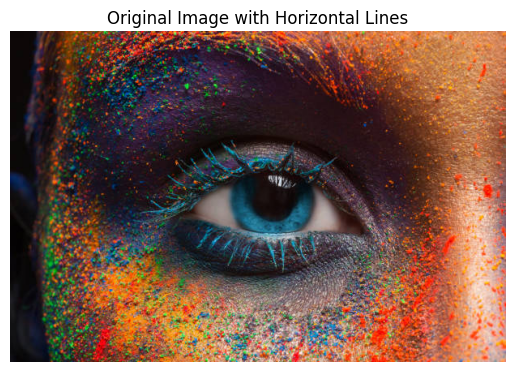

In [22]:
dark_image = imread('/content/istockphoto-814423752-612x612.jpg')
plt.imshow(dark_image)
plt.title('Original Image with Horizontal Lines')
plt.axis('off')
plt.show()


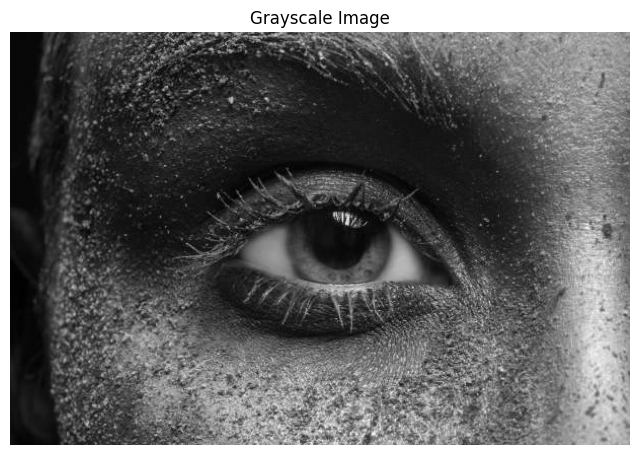

In [23]:
dark_image_grey = rgb2gray(dark_image)
plt.figure(figsize=(8, 6))
plt.imshow(dark_image_grey, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


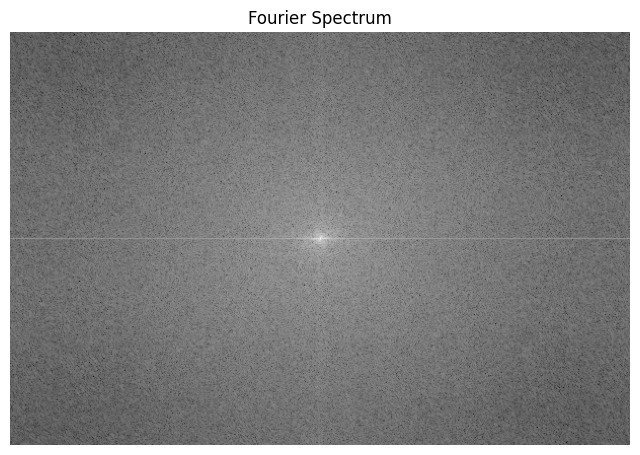

In [24]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(figsize=(8, 6))
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
plt.title('Fourier Spectrum')
plt.axis('off')
plt.show()


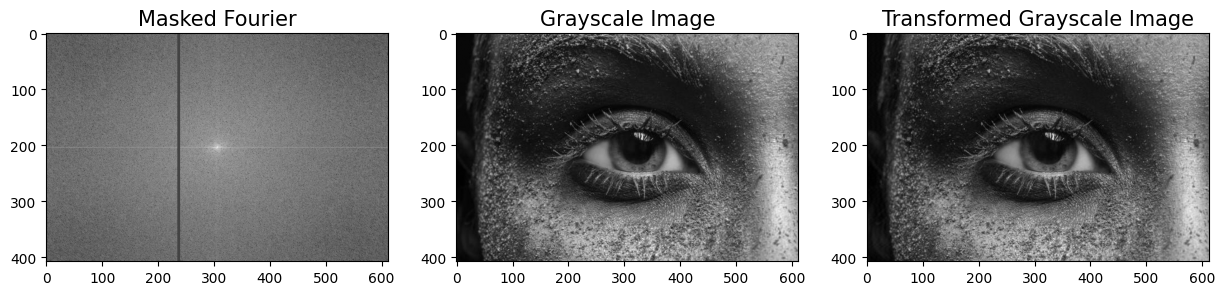

In [25]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[:225, 235:240] = i
    dark_image_grey_fourier[-225:, 235:240] = i
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize=f_size)
    ax[1].imshow(rgb2gray(image), cmap='gray')
    ax[1].set_title('Grayscale Image', fontsize=f_size)
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), cmap='gray')
    ax[2].set_title('Transformed Grayscale Image', fontsize=f_size)
    plt.show()

fourier_masker_ver(dark_image, 1)


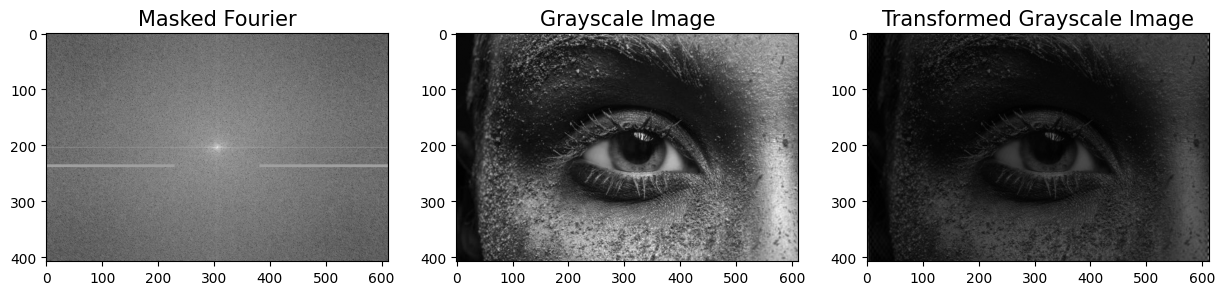

In [34]:
def fourier_masker_hor(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[235:240, :230] = i
    dark_image_grey_fourier[235:240, -230:] = i
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize=f_size)
    ax[1].imshow(rgb2gray(image), cmap='gray')
    ax[1].set_title('Grayscale Image', fontsize=f_size)
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), cmap='gray')
    ax[2].set_title('Transformed Grayscale Image', fontsize=f_size)
    plt.show()

fourier_masker_hor(dark_image, 255)


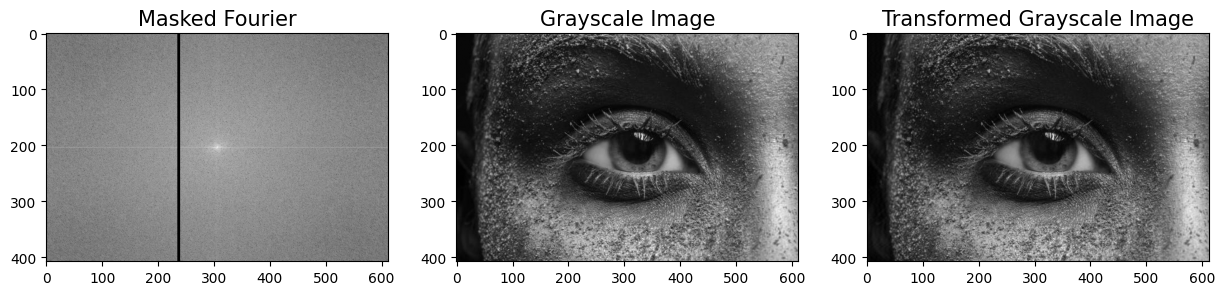

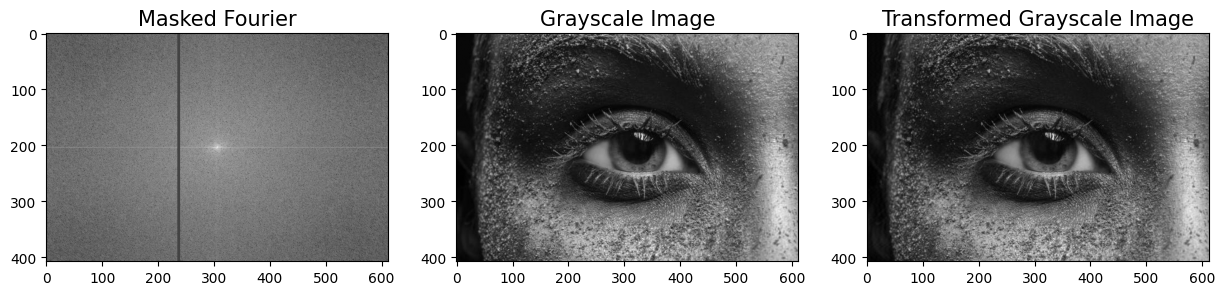

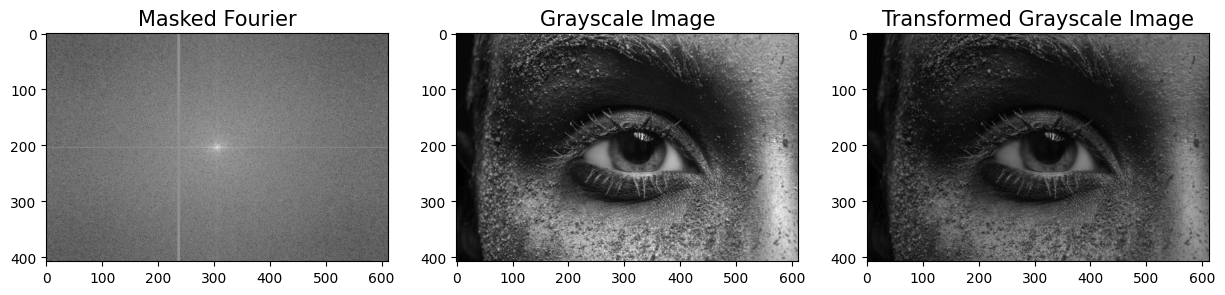

In [27]:
def fourier_iterator(image, value_list):
    for i in value_list:
        fourier_masker_ver(image, i)

fourier_iterator(dark_image, [0.001, 1, 100])


In [28]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:, 235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))

    final_image = np.dstack([transformed_channels[0].astype(int),
                             transformed_channels[1].astype(int),
                             transformed_channels[2].astype(int)])

    fig, ax = plt.subplots(1, 2, figsize=(17, 12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize=f_size)
    ax[0].axis('off')
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize=f_size)
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()


In [29]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:, 235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))

    final_image = np.dstack([transformed_channels[0].astype(int),
                             transformed_channels[1].astype(int),
                             transformed_channels[2].astype(int)])

    fig, ax = plt.subplots(1, 2, figsize=(17, 12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize=f_size)
    ax[0].axis('off')
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize=f_size)
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()


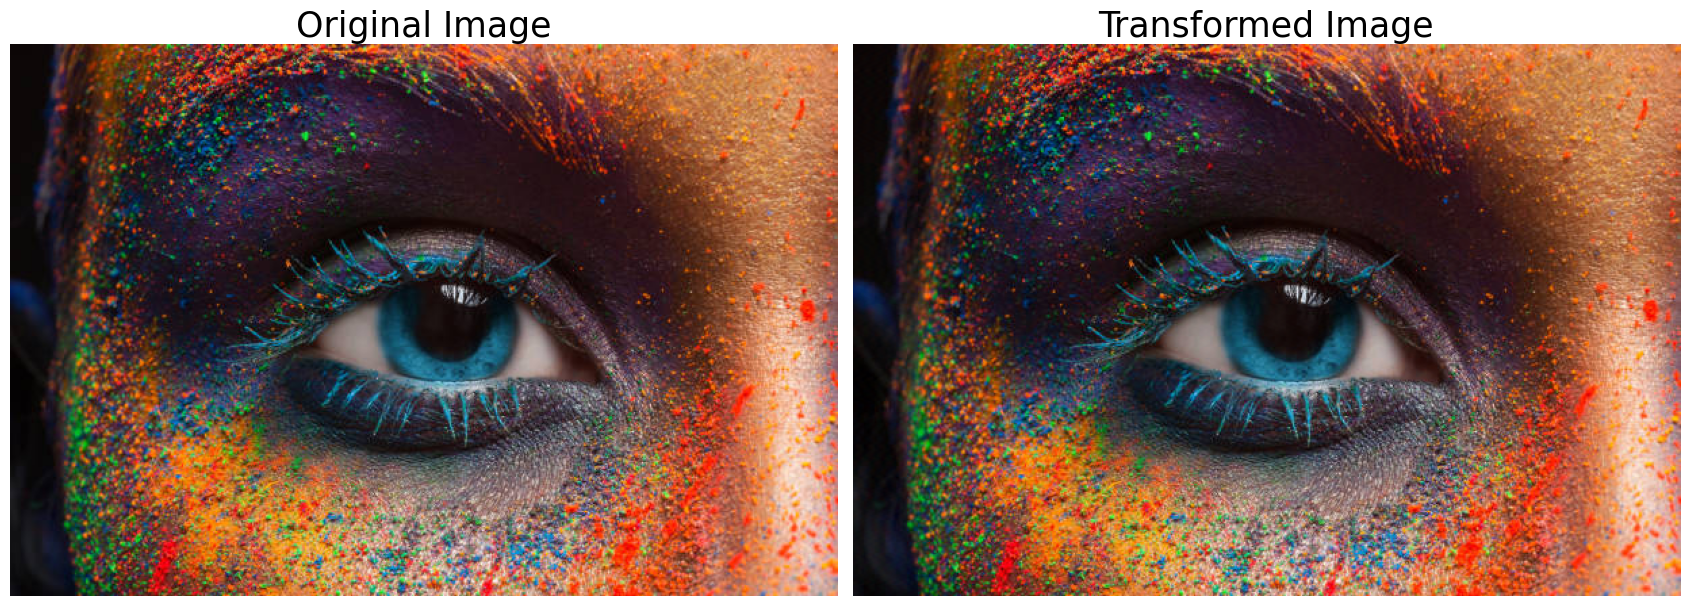

In [30]:
fourier_transform_rgb(dark_image)
